# Assignment 02
To enhance restaurants' understanding of tipping behavior, helping tailor services and optimize operations develop a predictive model to estimate tip amounts in restaurants based on customer billing and demographic details

Dataset URL:
https://drive.google.com/file/d/1Xkm84DEOHqZ6YNnNP3jzerpUPU6LoCyJ/view

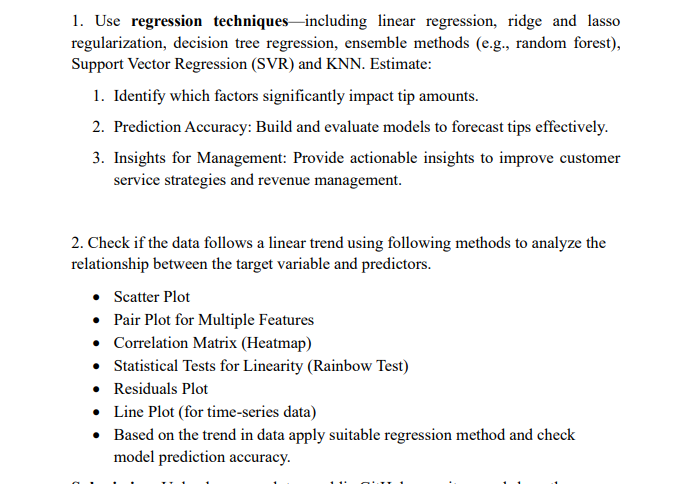

Data Analysis
### 1. Preliminary Data Check

In [1]:
#Acquiring the data
import pandas as pd
df = pd.read_csv('tips (data for regression problem).csv')



In [17]:
# Data Overview
print("Data Overview:")
print(df.head())


Data Overview:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [18]:
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [19]:

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [20]:
print("/nMissing values in each column:")
print(df.isnull().sum())

/nMissing values in each column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [21]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())
#The number is only 1 and also it obvious that few data points can be same.


Number of duplicate rows:
1


In [22]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [23]:
print("\nCategorical Variable Counts:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Categorical Variable Counts:

sex value counts:
sex
Male      157
Female     87
Name: count, dtype: int64

smoker value counts:
smoker
No     151
Yes     93
Name: count, dtype: int64

day value counts:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time value counts:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


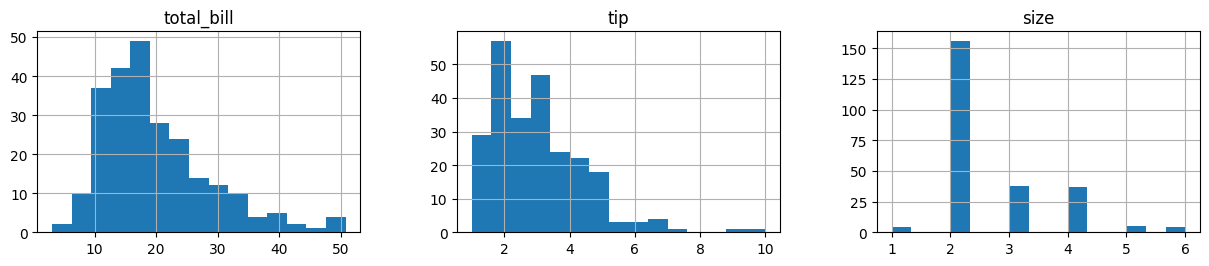

In [24]:
df.hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

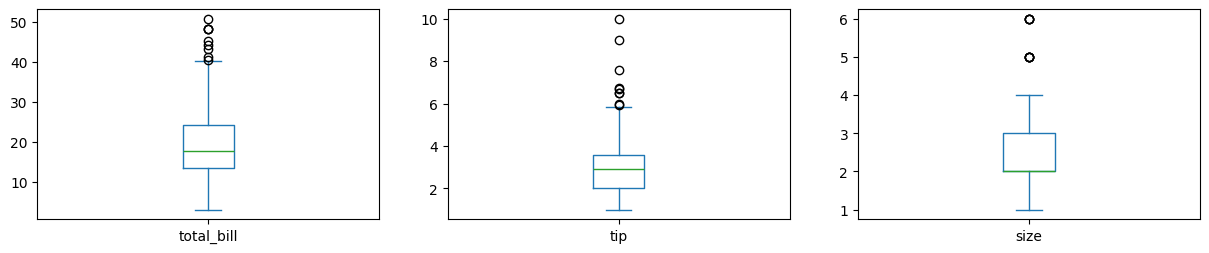

In [25]:
import numpy as np
import matplotlib.pyplot as plt
df.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 6))
plt.show()

### 2. Exploratory Data Analysis (EDA)
We will apply different strategies to check linear trend using the methods specified.

Scatter plot:
- The total_bill and tip column are numerical. The bivariate analysis can be done here for these columns using scatterplot from either sns or matplotlib.

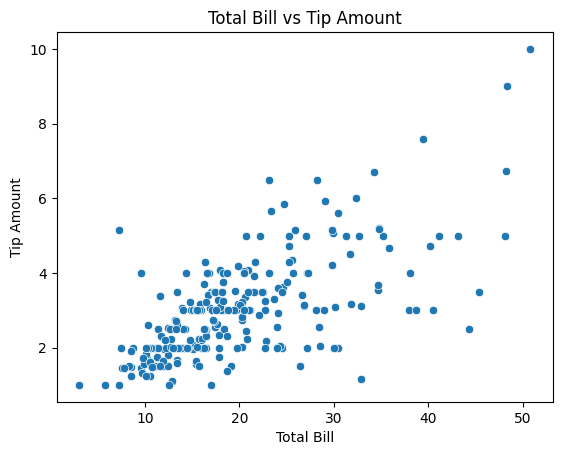

In [26]:
# visualizing the relationship between the tip amount and the total bill.

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x = 'total_bill', y = 'tip')
plt.title("Total Bill vs Tip Amount")
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

Observation: There's a positive correlation between the total bill and tip amount, suggesting that as the bill increases, the tip amount tends to increase., though there may also be some variability. There are some outlier points as well, let see further analysis to check about these.

#### Pair Plot for Multiple Features:
- for the pairplot we can pick different cateogrical variable for the hue and analyze what outcomes we see.

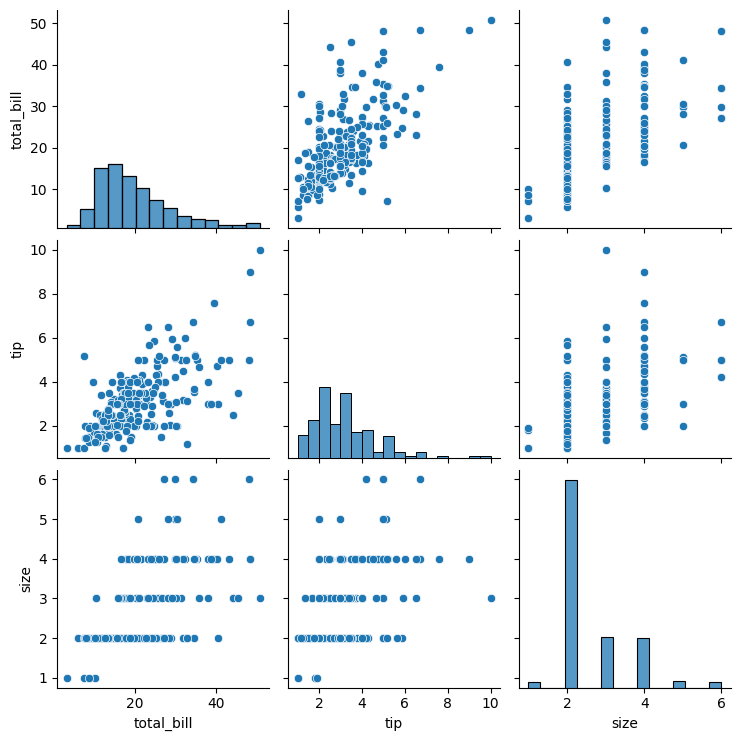

In [27]:
sns.pairplot(df)
plt.show()

Time as hue:

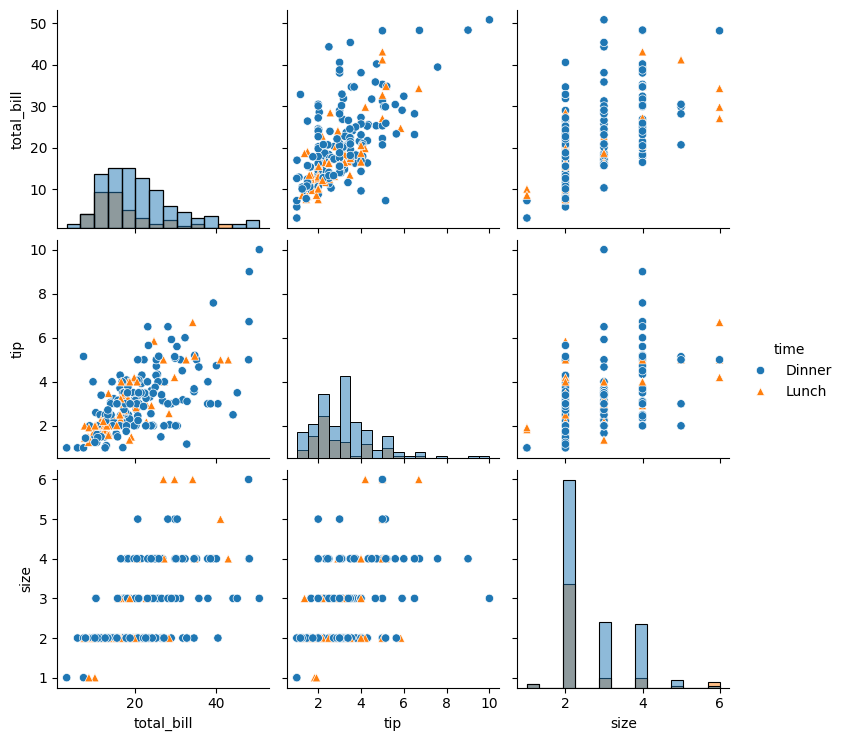

In [28]:
sns.pairplot(df, hue = 'time', diag_kind = 'hist', markers=['o', '^'] )
plt.show()

Analysis
- can see the distribution of tips and total bills for different times of day.
- The relationship between total_bill and tip appears to have a positive correlation across different times, which is consistent with what we observed in the scatter plot.
- we can also observe how size of the party influences both the total bill and tip amount.
- As the size increases the minimum amount of tip also increases

Sex as Hue

In [29]:
# checking count of male and female datapoints
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


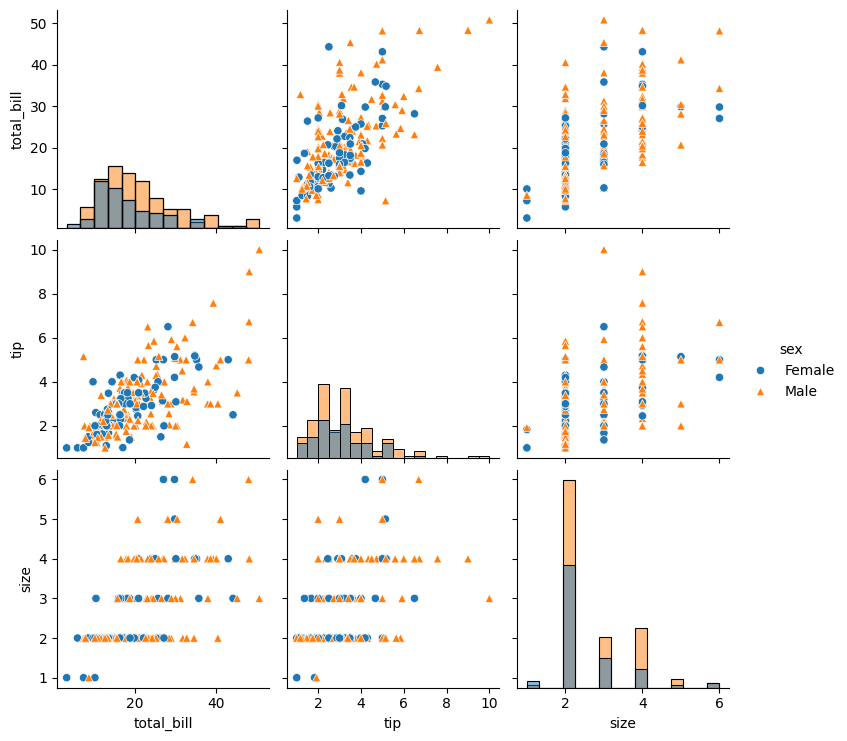

In [30]:

sns.pairplot(df, hue='sex', diag_kind='hist', markers=['o', '^'])
plt.show()

- The distribution of the total bill and tip suggests a wider range of values for males.
- There appear to be very slight differences in the total bill and tip amounts between male and female diners, with males possibly spending and tipping slightly more on average, though further statistical analysis would be needed to confirm if these differences are significant. Also noticed the female datapoints are less as compared to male counterpart so it might not represent the true behaviour.

Smoker as Hue

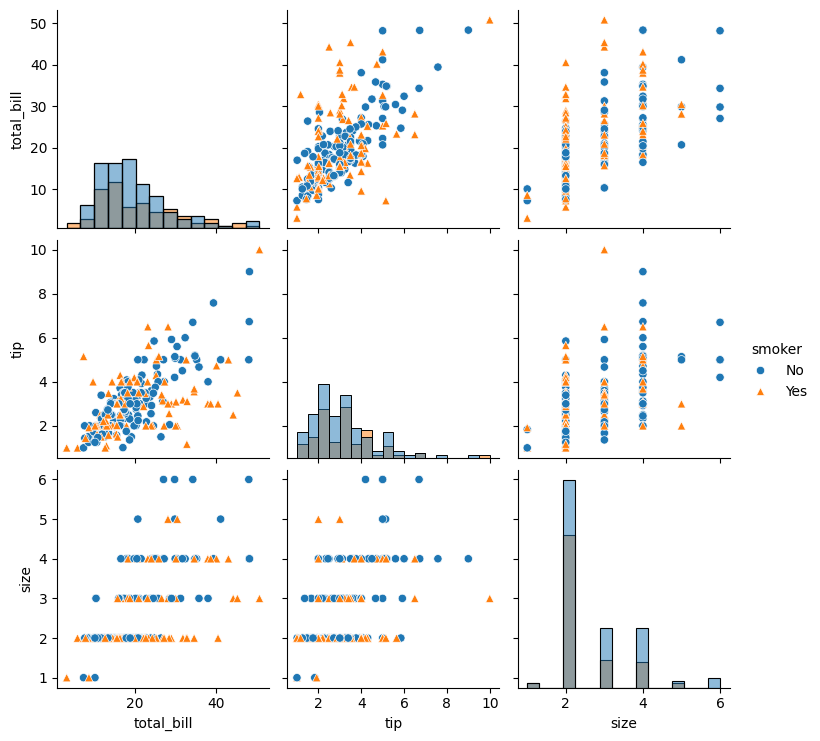

In [31]:
# Generate a pair plot with 'smoker' as the hue
sns.pairplot(df, hue='smoker', diag_kind='hist', markers=["o", "^"])
plt.show()


There doesn't seems any major significant difference in tipping behaviour

Day as Hue

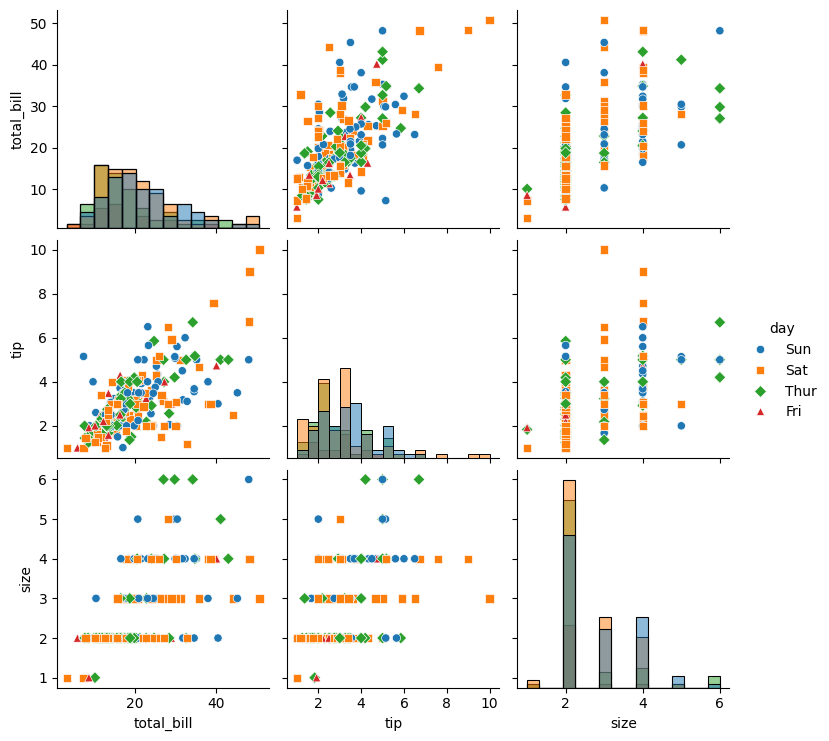

In [32]:
sns.pairplot(df, hue='day', diag_kind='hist', markers=["o", "s", "D", "^"])
plt.show()


#### Correlation Matrix (Heatmap)

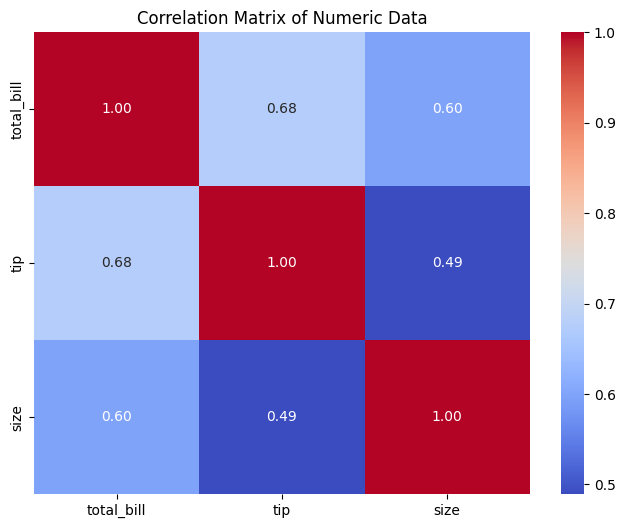

In [33]:
# Select only numeric columns for correlation matrix
numeric_data = df[['total_bill', 'tip', 'size']]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Data')
plt.show()


Total Bill vs. Tip: The correlation coefficient of 0.68 suggests a strong positive correlation. This indicates that as the total bill increases, the tip amount also tends to increase, which aligns with intuitive expectations that customers often base tips on a percentage of the bill.

Total Bill vs. Size: The correlation of 0.60 is also positive, indicating that larger groups generally have higher total bills, likely due to ordering more items.

Tip vs. Size: The correlation of 0.49 shows a moderate positive relationship. This suggests that larger parties not only tend to spend more but also tend to leave larger tips, although the relationship is not as strong as that between total bill and tip.

#### Statistical Tests for Linearity (Rainbow Test)

In [34]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = df['total_bill']
X = sm.add_constant(X)
y = df['tip']

model = sm.OLS(y,X).fit()

rainbow_sta, rain_p_value = linear_rainbow(model)
print("Rainbow Statistic:", rainbow_sta)
print("P-value:", rain_p_value)



Rainbow Statistic: 1.2291480226129028
P-value: 0.1291192152551375


Interpretation: The P-value of 0.129 suggests that we do not reject the null hypothesis at common significance levels (e.g., 0.05). This means there isn't sufficient evidence to suggest that the relationship between total_bill and tip deviates from linearity based on this test.

#### Residuals Plot

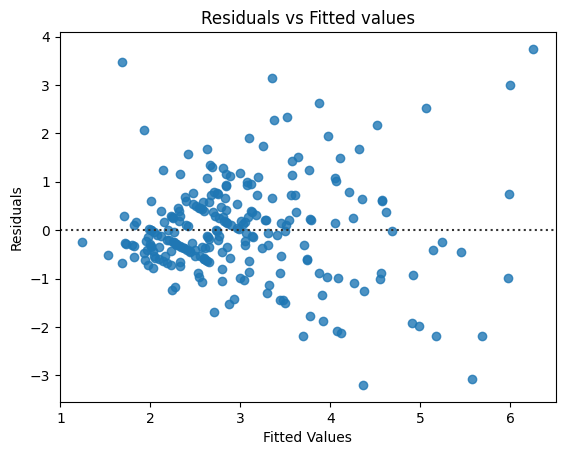

In [35]:
sns.residplot(x=model.fittedvalues, y = model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

Observations from the Residuals Plot:
- residuals are randomly scattered around zero, it indicates that the linearity assumption holds.
- Randomness: The residuals appear to be reasonably randomly dispersed around the horizontal line at zero, which is a good sign. There isn't a clear pattern such as a funnel shape or a curve, which would suggest problems like heteroscedasticity or non-linearity.
- The spread of residuals seems consistent across the range of predicted values, indicating that the variance of residuals is relatively stable.

#### Line Plot (for time-series data)

In our case, in the dataset it appears there is no explicit time-related column like something related to transaction bills or tip. For time-series analysis, you would need a column that captures the time dimension.

## Regression Modeling

#### Data preparation

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('tip',axis=1)
y = df_encoded['tip']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [3]:
#global dic to store results
results = {
}

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
cv_r2_lr = cross_val_score(lr, X, y, cv=5, scoring='r2').mean()

results['Linear Regression'] = {
    'RMSE': rmse_lr,
    'R^2': r2_lr,
    'Cross-Validated R^2': cv_r2_lr
}

print("Linear Regression RMSE:", results['Linear Regression']['RMSE'])
print("Linear Regression R^2:", results['Linear Regression']['R^2'])
print("Linear Regression Cross-Validated R^2:", results['Linear Regression']['Cross-Validated R^2'])


Linear Regression RMSE: 0.8386635807900631
Linear Regression R^2: 0.43730181943482493
Linear Regression Cross-Validated R^2: 0.4214926123925262


Notes:
- If we want to improve the model their are few methods we can implement such as feature selection to select significant features or cross-validation, handling outliers using z-score, and implemneting regularization like ridge, lasso for overfitting. we can use z-score as well.

In [106]:
#Trying K fold cross validation
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [(-score)**0.5 for score in scores]
print(f'Cross-Validated RMSE: {sum(rmse_scores)/len(rmse_scores)}')


Cross-Validated RMSE: 1.0395417052145322


#### Ridge and Lasso Regression
- we will do feature scaling.
- here we need to tune the hyperparameter aplha that controls regularization strength

In [107]:
#Using grid search cv to find best aplha

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#defining parameter grid
param_grid = {'alpha': [0.1,1,10,100,1000]}

# Ridge Regression
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha_ridge = grid_search.best_params_['alpha']

print('Best alpha for Ridge Regression:', best_alpha_ridge)

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_best = Ridge(alpha = best_alpha_ridge)
ridge_best.fit(X_train, y_train)
y_pred_ridge = ridge_best.predict(X_test)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
cv_r2_ridge = cross_val_score(ridge_best, X, y, cv=5, scoring='r2').mean()

results['Ridge Regression'] = {
    'RMSE': rmse_ridge,
    'R^2': r2_ridge,
    'Cross-Validated R^2': cv_r2_ridge
}

print("Ridge Regression RMSE:", results['Ridge Regression']['RMSE'])
print("Ridge Regression R^2:", results['Ridge Regression']['R^2'])
print("Ridge Regression Cross-Validated R^2:", results['Ridge Regression']['Cross-Validated R^2'])

Best alpha for Ridge Regression: 100
Ridge Regression RMSE: 0.7896391047964416
Ridge Regression R^2: 0.5011646321479138
Ridge Regression Cross-Validated R^2: 0.45395184108030107


In [108]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation
print('Decision Tree RMSE:', mean_squared_error(y_test, y_pred_dt, squared=False))


Decision Tree RMSE: 1.120354353564541


#### Lasso

In [7]:
#Using grid search cv to find best aplha

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#defining parameter grid
param_grid = {'alpha': [0.01,0.1,1,10,100]}

# lasso Regression
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha_lasso = grid_search.best_params_['alpha']

print('Best alpha for lasso Regression:', best_alpha_lasso)

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_best = Lasso(alpha = best_alpha_lasso, max_iter = 10000)
lasso_best.fit(X_train, y_train)
y_pred_lasso = lasso_best.predict(X_test)

rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
cv_r2_lasso = cross_val_score(lasso_best, X, y, cv=5, scoring='r2').mean()

results['lasso Regression'] = {
    'RMSE': rmse_lasso,
    'R^2': r2_lasso,
    'Cross-Validated R^2': cv_r2_lasso
}

print("lasso Regression RMSE:", results['lasso Regression']['RMSE'])
print("lasso Regression R^2:", results['lasso Regression']['R^2'])
print("lasso Regression Cross-Validated R^2:", results['lasso Regression']['Cross-Validated R^2'])

Best alpha for lasso Regression: 0.1
lasso Regression RMSE: 0.768669542129225
lasso Regression R^2: 0.5273068720881755
lasso Regression Cross-Validated R^2: 0.45664758158245383


#### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor

# Define Decision Tree Regressor and parameter grid for GridSearchCV
dt = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params_dt = grid_search.best_params_
print('Best parameters for Decision Tree:', best_params_dt)

# Fit Decision Tree with the best parameters found
dt_best = DecisionTreeRegressor(**best_params_dt, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)

# Calculate metrics
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
cv_r2_dt = cross_val_score(dt_best, X, y, cv=5, scoring='r2').mean()


results['Decision Tree'] = {
    'RMSE': rmse_dt,
    'R^2': r2_dt,
    'Cross-Validated R^2': cv_r2_dt
}

results['Decision Tree']


Best parameters for Decision Tree: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


{'RMSE': 1.0230268301744656,
 'R^2': 0.16271369002590974,
 'Cross-Validated R^2': 0.36330978614143844}

Notes:
- Prevent overfitting by limiting tree depth.
- Using models like Random Forest or Gradient Boosting.

#### Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Fit RandomForestRegressor with the best parameters found
rf_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Calculate metrics
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
cv_r2_rf = cross_val_score(rf_best, X, y, cv=5, scoring='r2').mean()

results['Random Forest'] = {
    'RMSE': rmse_rf,
    'R^2': r2_rf,
    'Cross-Validated R^2': cv_r2_rf
}

results['Random Forest']


Best Parameters for Random Forest: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


{'RMSE': 0.9150105424296715,
 'R^2': 0.3301892111977054,
 'Cross-Validated R^2': 0.4503736001154418}

notes:
- More trees can improve performance but increase computation time.
- Use Feature Importance to identify significant features.

In [10]:

# Get feature importances
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display feature importances
feature_importance_df



,Feature,Importance
0,total_bill,0.767043
3,smoker_Yes,0.069417
1,size,0.058045
4,day_Sat,0.030292
5,day_Sun,0.025223
2,sex_Male,0.025187
7,time_Lunch,0.012975
6,day_Thur,0.011818


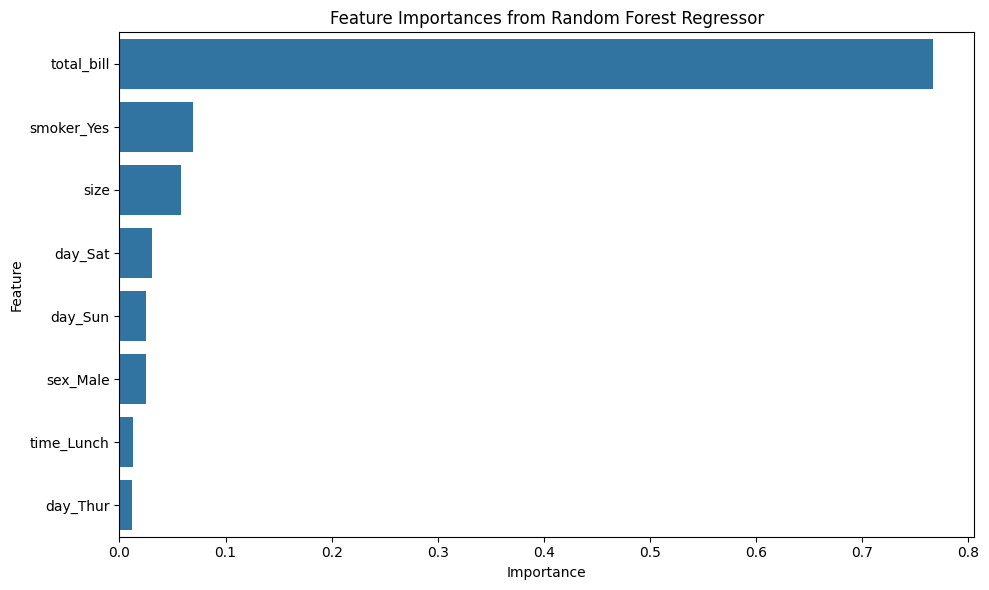

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


It suggestes the important feature is total bill.

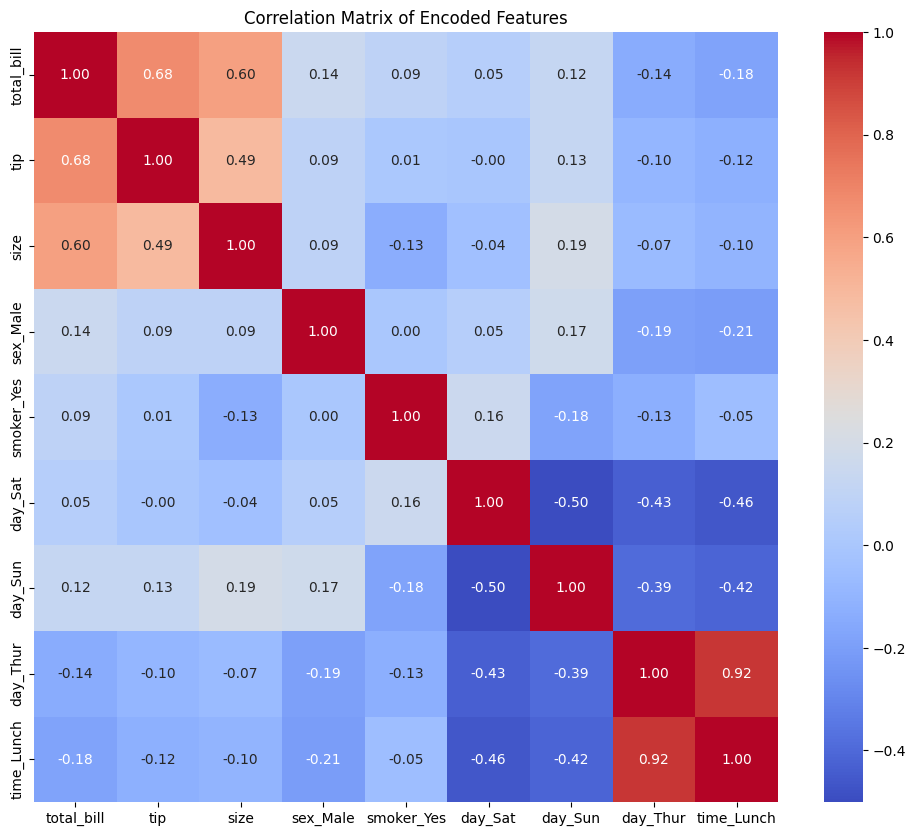

In [13]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Encoded Features')
plt.show()


#### Support Vector Regression (SVR)

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X and y
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
print("Best Parameters for SVR:", best_params)

svr_best = SVR(**best_params)
svr_best.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_best.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
cv_r2 = cross_val_score(svr_best, scaler_X.transform(X), scaler_y.transform(y.values.reshape(-1, 1)).ravel(), cv=5, scoring='r2').mean()
results['SVR'] = {
    'RMSE': rmse,
    'R^2': r2,
    'Cross-Validated R^2': cv_r2
}

print(results['SVR'])


Best Parameters for SVR: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
{'RMSE': 0.8991599349742502, 'R^2': 0.3531943018370176, 'Cross-Validated R^2': 0.37292637724169897}


notes for Improving Performance:
- Kernel Choice: Try different kernels.
- Hyperparameter Tuning: Critical for SVR performance.
- Feature Scaling: Ensure proper scaling.

#### K-Nearest Neighbors Regression

In [113]:
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Parameters for KNN:", best_params)

knn_best = KNeighborsRegressor(**best_params)
knn_best.fit(X_train_scaled, y_train)

y_pred = knn_best.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

cv_r2 = cross_val_score(knn_best, X_scaled, y, cv=5, scoring='r2').mean()

results['KNN'] = {
    'RMSE': rmse,
    'R^2': r2,
    'Cross-Validated R^2': cv_r2
}

results['KNN']


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


{'RMSE': 0.9227154525684328,
 'R^2': 0.31886134059917093,
 'Cross-Validated R^2': 0.3240087723201629}

In [114]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
print(results_df)

               Model      RMSE       R^2  Cross-Validated R^2
0  Linear Regression  0.838664  0.437302             0.421493
1   Ridge Regression  0.789639  0.501165             0.453952
2   lasso Regression  0.768670  0.527307             0.456648
3      Decision Tree  1.023027  0.162714             0.363310
4      Random Forest  0.919541  0.323540             0.377749
5                SVR  0.899160  0.353194             0.372926
6                KNN  0.922715  0.318861             0.324009


### Interpretation of Results
Lasso Regression
- Best Performer with the lowest RMSE and highest R² scores. Lasso's regularization reduces overfitting and selects only the most significant features.

Ridge Regression
- Second Best Performer with slightly higher RMSE and lower R² than Lasso.
Ridge penalizes large coefficients but doesn't eliminate them, leading to slightly less feature selection compared to Lasso.

Linear Regression
- Moderate Performance with higher RMSE and lower R² than Ridge and Lasso.
Without regularization, the model may be overfitting to noise in the training data.

Decision Tree
- Poor Performance with the highest RMSE and lowest R² among all models.
Likely overfitting the training data due to lack of regularization and small dataset.

Random Forest, SVR, KNN
- Lower Performance than linear models.
These models might require more data or hyperparameter tuning to perform well.

#### Model Selection
Based on the evaluation, Lasso Regression is the most effective model for predicting tip amounts. It balances bias and variance effectively and provides insights into significant predictors through its feature selection capability.

### Interpretation of Results:


The objective of this analysis is to enhance restaurants' understanding of tipping behavior by developing predictive models to estimate tip amounts based on customer billing and demographic details. We employed several regression techniques, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest, Support Vector Regression (SVR), and K-Nearest Neighbors (KNN).

### **1. Identifying Significant Factors Impacting Tip Amounts**

####  **Interpretation of Significant Factors**

- **Total Bill**

  - **Effect:** Positive correlation with tip amount.
  - **Interpretation:** Customers tend to tip more when the total bill is higher, possibly due to tipping norms based on a percentage of the bill.

- **Party Size**

  - **Effect:** Positive correlation with tip amount.
  - **Interpretation:** Larger groups may tip more in total, although individual tipping behavior might vary.

- **Time of Day (Dinner vs. Lunch)**

  - **Effect:** Positive correlation if 'Dinner' is coded higher.
  - **Interpretation:** Dinner guests may tip more than lunch guests, potentially due to higher total bills or different customer demographics.

- **Smoker Status**

  - **Effect:** Negative correlation with tip amount.
  - **Interpretation:** Smokers may tip less than non-smokers, possibly due to different spending habits or cultural factors.

### **2. Insights for Management**

Using the findings from our analysis, we can provide actionable insights to improve customer service strategies and revenue management.

#### **2.1. Emphasize High-Quality Service for Larger Bills**

- **Upselling Strategies**

  - Train staff to suggest add-ons or premium items to increase the total bill, which is positively correlated with higher tips.

- **Value-Added Services**

  - Offer complimentary items or superior service for higher bills to encourage repeat business and higher tips.

#### **2.2. Encourage Group Dining**

- **Group Discounts**

  - Implement promotions for larger parties to attract groups, as party size positively impacts tip amounts.

- **Special Event Packages**

  - Create packages for celebrations or corporate events to bring in larger groups.

#### **2.3. Optimize Dinner Service**

- **Enhance Dinner Experience**

  - Focus on improving ambiance, menu variety, and service quality during dinner hours to capitalize on higher tipping behavior.

- **Targeted Marketing**

  - Run dinner-specific promotions to attract more customers during this time.

#### **2.4. Understand and Cater to Smoker Preferences**

- **Designated Smoking Areas**

  - If permissible, provide comfortable smoking areas to enhance the dining experience for smokers.

- **Customized Offers**

  - Develop promotions or menu items that appeal to smokers to potentially increase their spending and tipping.

#### **2.5. Gender-Neutral Marketing**

- **Inclusive Campaigns**

  - Since gender does not significantly impact tip amounts, marketing efforts can be designed to appeal broadly without gender targeting.

#### **2.6. Day-Specific Promotions**

- **Weekday Specials**

  - Although the day of the week isn't a significant factor, weekday promotions can help increase overall customer volume.

### **3. Conclusion**

Our analysis has identified key factors that significantly impact tip amounts, with **total bill** and **party size** being the most influential. The **Lasso Regression** model provided the best predictive accuracy, highlighting the importance of feature selection and regularization in modeling.

**Recommendations:**

- **Focus on Strategies to Increase the Total Bill**

  - Implement upselling techniques and premium offerings.

- **Attract Larger Groups**

  - Offer group discounts and special packages.

- **Enhance Dinner Service**

  - Improve service quality and ambiance during dinner hours.

- **Cater to Smoker Preferences**

  - Provide amenities and promotions tailored to smokers where appropriate.